Task 2)Prediction using Decision Tree Algorithms


Dataset link:https://www.canva.com/link?target=http%3A%2F%2Farchive.ics.uci.edu%2Fml%2Fdatasets%2FIris&design=DAEjrwWV35w



In [ ]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as mt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
target=df['Species']
data=df.copy()
data=data.drop('Species',axis=1)
df.shape

(150, 6)

In [ ]:
X=df.iloc[:,[0,1,2,3]].values
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
y=df['Species'].values
df.shape

(150, 6)

Training the model


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)

Traingin split: (120, 4)
Testin spllit: (30, 4)


Defining Decision Tree Algorithm

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Decision Tree Classifier created!")


Decision Tree Classifier created!


Classification Report and Confusion Matrix

In [ ]:
y_pred=dtree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred))


The Accuracy is 1 or 100% since I took all the 4 features of the iris dataset

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [ ]:
pd.array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int)

<PandasArray>
[
[10, 0, 0],
[0, 9, 0],
[0, 0, 11]
]
Shape: (3, 3), dtype: int64

Visualization of trained model

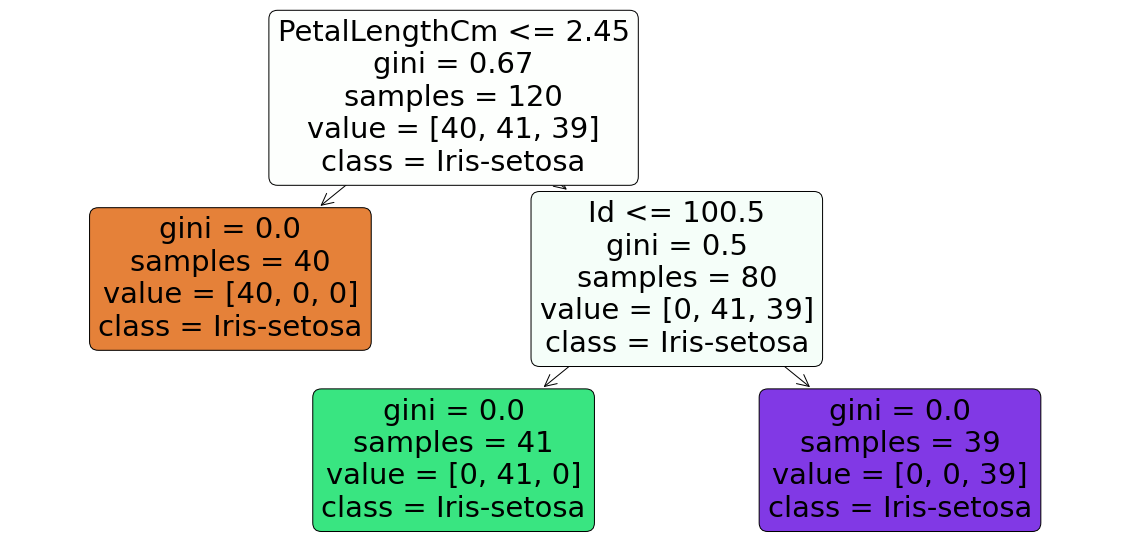

In [ ]:
mt.figure(figsize=(20,10))
tree=plot_tree(dtree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=target.values)

The Decision Tree Classifier is created and is visualized graphically.